# Poisson Pressure Solver

This notebook demonstrates a pressure Poisson solver using Jacobi's iterative method for incompressible flows.

You can adjust the resolution, tolerance, and maximum number of iterations below and re-run the solver.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Editable simulation parameters
nx = 50         # number of grid points in x
ny = 50         # number of grid points in y
lx = 1.0        # physical length in x
ly = 1.0        # physical length in y
rho = 1.0       # fluid density
tol = 1e-6      # solver tolerance
maxiter = 5000  # maximum number of iterations

In [13]:
# Define grid spacing
dx = lx / (nx - 1)
dy = ly / (ny - 1)

# Initialize pressure and divergence field
p = np.zeros((ny, nx))
b = np.random.rand(ny, nx) * 0.1  # synthetic divergence source

# Define iterative solver.
def pressure_poisson(p, b, dx, dy, tol, maxiter, rho):
    err = np.inf  # Initialize large error
    nit = 0  # Iteration counter
    pcoef = 0.5 / (dx**2 + dy**2)
    b *= rho * dx**2 * dy**2 / (2 * (dx**2 + dy**2))

    while err > tol and nit < maxiter:
        pn = p.copy()

        # p[1:-1, 1:-1] = (pcoef * (
        #     (pn[1:-1, 2:] + pn[1:-1, :-2]) * dy**2 +
        #     (pn[2:, 1:-1] + pn[:-2, 1:-1]) * dx**2
        # ) - b)

        p[1:-1, 1:-1] = (pcoef * (
          (pn[1:-1, 2:] + pn[1:-1, :-2]) * dy**2 +
          (pn[2:, 1:-1] + pn[:-2, 1:-1]) * dx**2
        ) - b[1:-1, 1:-1])
        # Neumann BCs
        p[:, 0] = p[:, 1]
        p[:, -1] = -p[:, -2]
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]

        err = np.sqrt(np.mean((p[1:-1, 1:-1] - pn[1:-1, 1:-1])**2))
        nit += 1

    print(f"Converged in {nit} iterations with RMS error = {err:.2e}")
    return p

In [14]:
# Run Solver
p_final = pressure_poisson(p, b, dx, dy, tol, maxiter, rho)

Converged in 5000 iterations with RMS error = 1.22e-06


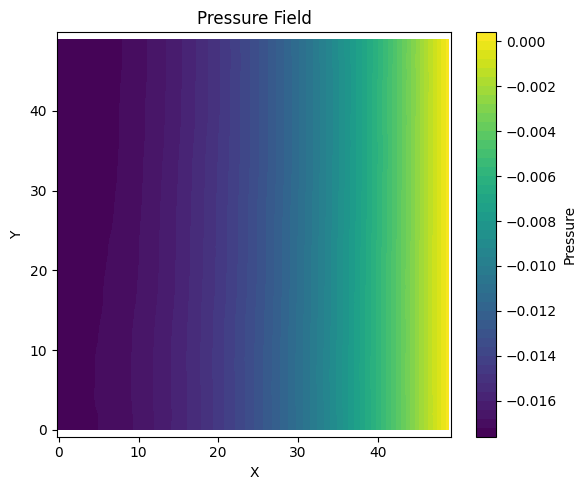

In [15]:
# Plot Solutions
plt.figure(figsize=(6, 5))
plt.contourf(p_final, levels=50, cmap='viridis')
plt.colorbar(label='Pressure')
plt.title('Pressure Field')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()
